# Introducción al aprendizaje No supervisado

Previamente, aprendimos a usar regresiones lineales y otros clasificadores para estudiar si ciertas caracteristicas son útiles para predecir el resultado observado.

En este notebook, pasaremos de la predicción a encontrar patrones.


Qué haremos en este notebook:
-----

1. Entregar una introducción general al aprendizaje no supervisado.
1. Usar agrupamiento k-means como tecnica de aprendizaje no supervisado.
1. Cargar y explorar un set de datos.
1. Encontrar grupos mediante algoritmos k-means.
1. Evaluar nuestro resultado con el método Elbow.

Aprendizaje no supervisado: Búsqueda de patrones en los datos. 🔍
------

El Aprendizaje no supervisado es el proceso mediante el cual identificamos patrones en el conjunto de datos. A menudo, identificar patrones es un paso inicial para entender nuestro datos. Los métodos de aprendizaje no supervisado son una serie de técnicas diseñadas para _explorar_ y encontrar "estructuras escondidas" más que predecir resultados.

El aprendizaje no supervisado no necesita datos etiquetados, por lo tanto puede trabajar en un rango más amplio de datos. De hecho, la mayor parte de los datos del mundo no están etiquetados. Sin embargo, ya que no hay etiquetas / respuestas correctas no siempre hay una retroalimentación clara para validar que los resultados son correctos.

¿Qué es el Clustering?
-----
<br>
<center><img src="./images/clustering.png" width="700"></center>

El agrupamiento (clustering), es tal como suena: juntar los datos en sub-grupos (clusters) basados en caracteristicas similares. Entonces, esos subgrupos son usados para el analisis posterior. El clustering es una forma intuitiva de entender los diversos segmentos naturales que conforman una población de datos y ayuda a facilitar la visualización de ellos.

El método Clustering también es llamado [análisis de grupos](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_grupos) o segmentación de datos.

Introducción al agrupamiento usando K-means
------

<br>
<center><img src="./images/k_means.png" width="700"></center>


K-means es una de las técnicas de agrupamiento más usadas. El objetivo del algoritmo K-means, es encontrar un conjunto de puntos cercanos entre si (un cluster) y que además estén lejos de otros puntos (otros clusters).

Cómo hacemos un agrupamiento usando k-means?
-----

Se inicia generando _k_ centroides <i>al azar</i> dentro de los datos.

Luego se alterna entre dos pasos:

1. Paso de asignación: Las observaciones se asignan a un grupo donde el centro está más cerca de ellos.

2. Paso de actualización: Se determinan nuevos puntos centrales de los grupos.

El proceso se repite hasta que las observaciones se vuelven distantes a diferentes grupos y el centro de cada grupo no se mueve.

En otras palabras, las observaciones se reasignan constatemente a los grupos, hasta que se minimiza la distancia entre una observación y el punto central más cercano.

-----
Ejemplo: Ajuste de K-means a datos reales de prestamos (kiva.org)
------

Ahora vamos a ajustar k-means a una <b>partición</b> o <b>segmento</b> de los datos de Kiva en clusters.

Importemos los paquetes más importantes para comenzar el código:

In [90]:
# Carga y manipulación de datos
import pandas as pd
import numpy as np

# K-Means clustering algorithm
from sklearn.cluster import KMeans

# Para graficar
import seaborn as sns
import matplotlib.pyplot as plt

# Coloca los gráficos en el Jupyter Notebook
%matplotlib inline

# Mantiene todos los datos visibles
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

----
Cargar y explorar los datos
-----

In [23]:
# Carga datos que se guardan localmente
path_filename = 'loans.csv'
df = pd.read_csv(path_filename)

In [ ]:
# Load data from Github if using colab
#!git clone https://github.com/DeltaAnalytics/machine_learning_for_good_data
#df = pd.read_csv("machine_learning_for_good_data/loans.csv")

In [24]:
df.columns

Index(['id_number', 'loan_amount', 'lender_count', 'status', 'funded_date',
       'funded_amount', 'repayment_term', 'location_country_code', 'sector',
       'description', 'use'],
      dtype='object')

**id_number**: ID único por préstamo (ID de préstamo)<br>
**loan_amount**: la cantidad desembolsada por el agente de campo al prestatario (USD)<br>
**lender_count**:el número total de prestamistas que contribuyeron a este préstamo<br>
**status**:realizado o no realizado el préstamo.<br>
**funded_date**: fecha en el que los prestamistas financian completamente el préstamo publicado en Kiva<br>
**funded_amount**: la cantidad desembolsada por Kiva al agente de campo (USD)<br>
**repayment_term**: el número de meses en los que se espera que el prestatario pague el préstamo<br>
**location_country_code**: código país (alfabético)<br>
**sector**: Categoría de alto nivel<br>
**description**: descripción del préstamo y del prestatario, disponible para posibles prestamistas en Kiva.<br>
**use**: descripción del uso del monto del préstamo<br>

Siempre es una buena idea 💡 echar un vistazo a los datos sin procesar.

In [25]:
df.head(10)

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
5,743125,725,27,funded,2014-08-18T23:08:00Z,725,13,BJ,Retail,NaN,NaN
6,743130,725,27,funded,2014-08-19T12:14:49Z,725,13,BJ,Retail,NaN,NaN
7,743134,525,14,funded,2014-07-28T06:20:44Z,525,13,BJ,Services,NaN,NaN
8,743207,950,35,funded,2014-08-26T14:24:08Z,950,14,BJ,Retail,NaN,NaN
9,743228,500,10,funded,2014-08-01T01:54:34Z,500,10,BJ,Food,NaN,NaN


In [26]:
print(f"Hay {df.shape[1]:,} columnas en el dataframe.")
print(f"Hay {df.shape[0]:,} filas en el dataframe.")

Hay 11 columnas en el dataframe.
Hay 6,019 filas en el dataframe.


In [27]:
df.describe()

,id_number,loan_amount,lender_count,funded_amount,repayment_term
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,1.359770e+06,1499.011464,35.661406,1325.070610,11.803290
std,3.719316e+05,2512.517280,73.420256,2444.726815,9.114948
min,1.377200e+04,50.000000,0.000000,0.000000,3.000000
25%,1.425188e+06,300.000000,7.000000,200.000000,8.000000
50%,1.550673e+06,625.000000,16.000000,525.000000,10.000000
75%,1.566204e+06,1825.000000,41.000000,1525.000000,14.000000
max,1.573593e+06,80000.000000,2665.000000,80000.000000,133.000000


Ahora que tenemos nuestros datos configurados, podemos comenzar a dividir nuestros datos en clústeres basados solo en algunas características. Pensemos cómo elegir estos ...

Como prestatario o prestamista potencial, ¿qué sería interesante explorar?

En los notebooks anteriores, hemos explorado algunas ideas interesantes:

- Cuánto dinero debe pedir prestado un prestatario
- El tiempo que lleva financiar un préstamo
- Qué características pueden influir en el monto del préstamo
- Si dividimos a los prestatarios en grupos distintos según la rapidez con la que pueden financiar un préstamo, ¿podremos aprender algo sobre estos grupos de prestatarios?

El algoritmo k-means utiliza características numéricas de valor continuo (k-means también se puede modificar para trabajar con características categóricas y ordinales).

-----

Escojamos un par de caracteristicas numéricas para el análisis:

¿Cómo se relacionan el monto financiado y los días para financiar?
----

In [69]:
# Mantiene solo las columnas relevantes
column_1 = 'funded_amount'
column_2 = 'repayment_term'
df = df[[column_1, column_2]] 

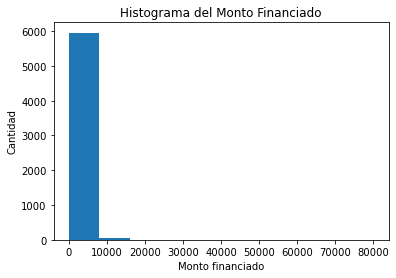

In [70]:
ax = df.funded_amount.hist(grid=False);

ax.set(xlabel='Monto financiado', 
       ylabel='Cantidad', 
       title='Histograma del Monto Financiado');  

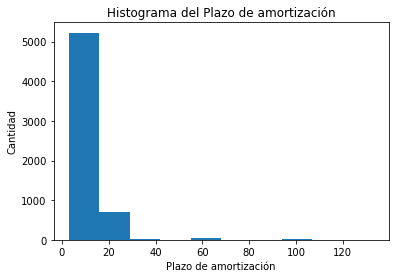

In [71]:
ax = df.repayment_term.hist(grid=False);

ax.set(xlabel='Plazo de amortización', 
       ylabel='Cantidad', 
       title='Histograma del Plazo de amortización');  

In [72]:
# Filtrar datos para eliminar valores atípicos (outliers)
funded_small = df.funded_amount < 2500  # Remover grandes préstamos
repayment_short = df.repayment_term < 60 # Remover largos periodos de amortización
df = df[funded_small & repayment_short]

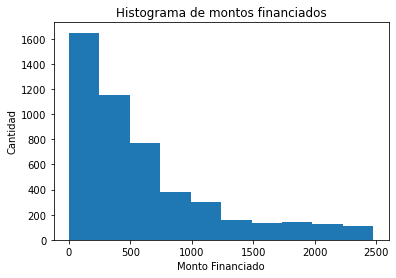

In [73]:
ax = df.funded_amount.hist(grid=False);

ax.set(xlabel='Monto Financiado', 
       ylabel='Cantidad', 
       title='Histograma de montos financiados');  

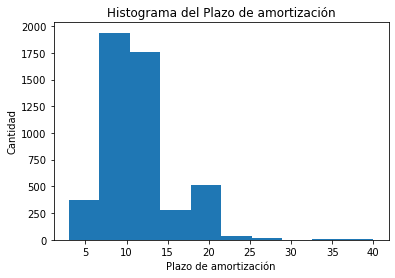

In [74]:
ax = df.repayment_term.hist(grid=False);

ax.set(xlabel='Plazo de amortización', 
       ylabel='Cantidad', 
       title='Histograma del Plazo de amortización'); 

In [75]:
print(f"Hay {df.shape[1]:,} columnas en el dataframe.")
print(f"Hay {df.shape[0]:,} filas en el dataframe.")

Hay 2 columnas en el dataframe.
Hay 4,928 filas en el dataframe.


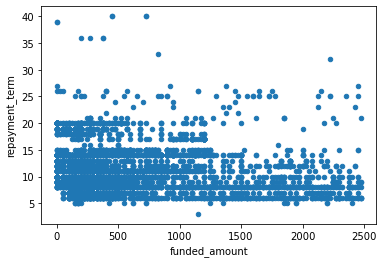

In [76]:
# Grafica la relación entre ambas variables
df.plot.scatter(x=column_1,
                y=column_2);

Clustering
======

----
Ajuste de nuestros datos con k-means usando scikit-learn
----

Ahora podemos correr el algoritmo k-means:

Podemos ver rápidamente la documentación de [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para k-means.

In [80]:
# Tomar la clase KMeans, inicializa y ajusta los datos.
kmeans = KMeans(n_clusters=2) # El numero de clusters deberían ser 2 o 3
kmeans.fit(df);

Ahora que tenemos nuestros clusters, la mejor forma de entenderlo es visualizandolo.

In [81]:
# Agrega las etiquetas de los cluster a cada punto del dataframe
df['kmeans_labels'] = kmeans.labels_

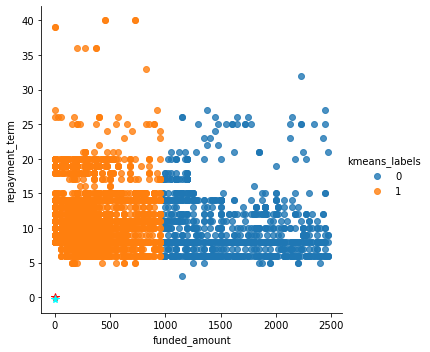

In [92]:
# grafica k-means
kmeans_plot = sns.lmplot(x=column_1, 
                       y=column_2, 
                       data=df, 
                       fit_reg=False,        # No ajusta una regresión lineal a los datos
                       hue="kmeans_labels",  #'hue' le da un color a cada grupo
                       legend=True);

# Grafica el promedio del cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*', markersize='8');

# Grafica el promedio del cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*', markersize='8');

# # Grafica el promedio del cluster #3 (cuando corresponde)
# kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

Eligiendo la cantidad de clusters
-----

El algoritmo de k-means es "ingenuo", ya que agrupa los datos en k grupos, aún si k no es el número correcto de grupos que se debería usar.

Arbitrariamente, nosotros ajustamos el número de grupos para que sean 2, pero determinar el número apropiado de grupos (clusters, k) es la parte más desafiante del procedimiento de agrupación.

No existe una regla estricta sobre cuál debería ser el valor de k ya que el número de grupos dependerá de los datos y del objetivo del análisis. El número de grupos que elijas en la partición de tus datos, influenciará directamente los resultados que puedas encontrar. En la mayoría de las áreas del análisis de datos, es atractivo tomar un agrupamiento lo más granulado posible, pero tener muchos clusters puede ser contraproducente ya que el agrupamiento no te dará mucha información.

_¿Es posible tener demasiados grupos? ¿O muy pocos grupos?_

Piensa en estos ejemplos extremos: 

1. Un cluster para todos tus datos
2. Un cluster para cada punto

Ninguna de estas opciones te dirá nada nuevo acerca de tus datos.

Más bien, el método de agrupamiento es más efectivo cuando las observaciones en el mismo grupo son similares entre si, además queremos que las observaciones en los diferentes grupos sean tan diferente como sea posible uno de otro. 


El método Elbow para explorar el número de clusters
------

El método de elbow (codo) es una forma simple e intuitiva para explorar como el cambio en el número de clusters impactará al "apretamiento" de los clusters. 

El método elbow corre el agrupamiento de k-means en el mismo conjunto de datos para un rango de valores de k (digamos que k es [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) y para cada valor de k, calcula la suma de errores cuadrados (Sum of Squared Errors, SSE) dentro de cada cluster.

SSE es la distancia entre cada punto y el promedio más cercano*, al cuadrado y sumada.

SSE es una medida de agrupaciones internamente coherentes. Cuanto más bajo es SSE, mejor (una puntuación invertida), significa que cada grupo es muy similar a sí mismo. SSE es como un puntaje de golf o frecuencia cardíaca, más bajo es mejor.

A medida que k aumenta, la mejora en SSE disminuirá. En algún momento esta falta de mejora será rápida, creando la forma de "codo".

Se debe elegir una cantidad de clusters tal que al agregar otro cluster no proporcione un modelado mucho mejor de los datos.

<sub>*En la figura no se logra apreciar completamente porque cada eje está en escalas muy diferentes. Típicamente, los datos que se usan en k-means están normalizados, por lo que los datos están en la misma escala estándar.</sub>


![](../images/elbow_method.png)

Lo que el método de elbow realiza, es lo siguiente:

1. Corre el algoritmo de k-means sobre tu conjunto de datos para un rango de k.
2. Para cada valor de k, calcula como el modelo se ajusta.
3. Si vemos un "codo" en nuestra verificación graficada, entonces eso marca un buen valor para k.


In [83]:
# Ajustemos un modelo diferente para cada valor de k
k_values = range(1, 10)

# Ajusta un modelo para cada valor de k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# Mira como los puntajes cambian
scores = [-k_mean_models[i].fit(df).score(df) 
              for i, model in enumerate(k_mean_models)] 

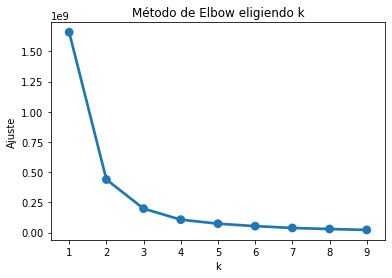

In [84]:
# Grafiquemos los efectos de k en el clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Ajuste', 
       title='Método de Elbow eligiendo k');

Estudio adicional
-----

Si quieres entender k-mean en profundidad, empieza el notebook que encontrarás [aquí](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

Si estás interesado/a en la teoría detrás de k-means, te recomendamos este gran recurso [aquí](https://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf). 